#### Project: Analyzing the trends of COVID-19 with Python
**Problem Statement:** 

   Given data about COVID 19 patients, write code to visualize the impact and analyze the trend of rate of infection and recovery as well as make predictions about the number of cases expected a week in future 
based on the current trends

**Dataset:** 
    CSV and Excel files containing data about Number of COVID 19 Confirmed, Deaths and 
Recovered patients both around the World and in India.

**Guidelines:**

   - Use pandas to accumulate data from multiple data files
   - Use plotly (visualization library) to create interactive visualizations
   - Use Facebooks prophet library to make time series models
   - Visualize the prediction by combining these technologies

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [8]:
data =pd.read_csv('./covid_19_clean_complete (4).csv')
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [9]:
data.rename(columns={"Date":"date","Province/State":"state","Country/Region":"country","Lat":"lat","Long":"long",
                     "Confirmed":"confirmed","Deaths":"deaths","Recovered":"recovered","Active":"active"},inplace=True)

In [10]:
data

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [14]:
data['active']=data['confirmed']-data['deaths']-data['recovered']
data['active']

0           0
1           0
2           0
3           0
4           0
         ... 
49063     117
49064     375
49065      19
49066    1147
49067     365
Name: active, Length: 49068, dtype: int64

In [15]:
data

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [19]:
data['date'].max()

'2020-07-27'

In [23]:
top = data[data['date'] == data['date'].max()]
top

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [24]:
data.drop(columns=['state'],inplace=True)

In [25]:
data

,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [26]:
w = data.groupby('country')[['confirmed','active','deaths','recovered']].sum().reset_index()

In [27]:
w

,country,confirmed,active,deaths,recovered
0,Afghanistan,1936390,1089052,49098,798240
1,Albania,196702,72117,5708,118877
2,Algeria,1179755,345886,77972,755897
3,Andorra,94404,19907,5423,69074
4,Angola,22662,15011,1078,6573
...,...,...,...,...,...
182,West Bank and Gaza,233461,170967,1370,61124
183,Western Sahara,901,190,63,648
184,Yemen,67180,25694,17707,23779
185,Zambia,129421,43167,2643,83611


In [33]:
fig = px.choropleth(w, locations = 'country',locationmode='country names',color='active',hover_name='country'
                    ,range_color=[1,1500],color_continuous_scale='Peach',title='Active Cases by Country')
fig.show()

In [37]:
fig = px.choropleth(w, locations = 'country',locationmode='country names',color='deaths',hover_name='country'
                    ,range_color=[1,1500],color_continuous_scale='Peach',title='Deaths Cases by Country')
fig.show()

In [38]:
fig = px.choropleth(w, locations = 'country',locationmode='country names',color='confirmed',hover_name='country'
                    ,range_color=[1,1500],color_continuous_scale='Peach',title='Confirmed Cases by Country')
fig.show()

In [39]:
fig = px.choropleth(w, locations = 'country',locationmode='country names',color='recovered',hover_name='country'
                    ,range_color=[1,1500],color_continuous_scale='Peach',title='Recovered Cases by Country')
fig.show()

In [40]:
t_cases = data.groupby('date')['confirmed'].sum().reset_index()
t_cases

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


Text(0, 0.5, 'Cases total')

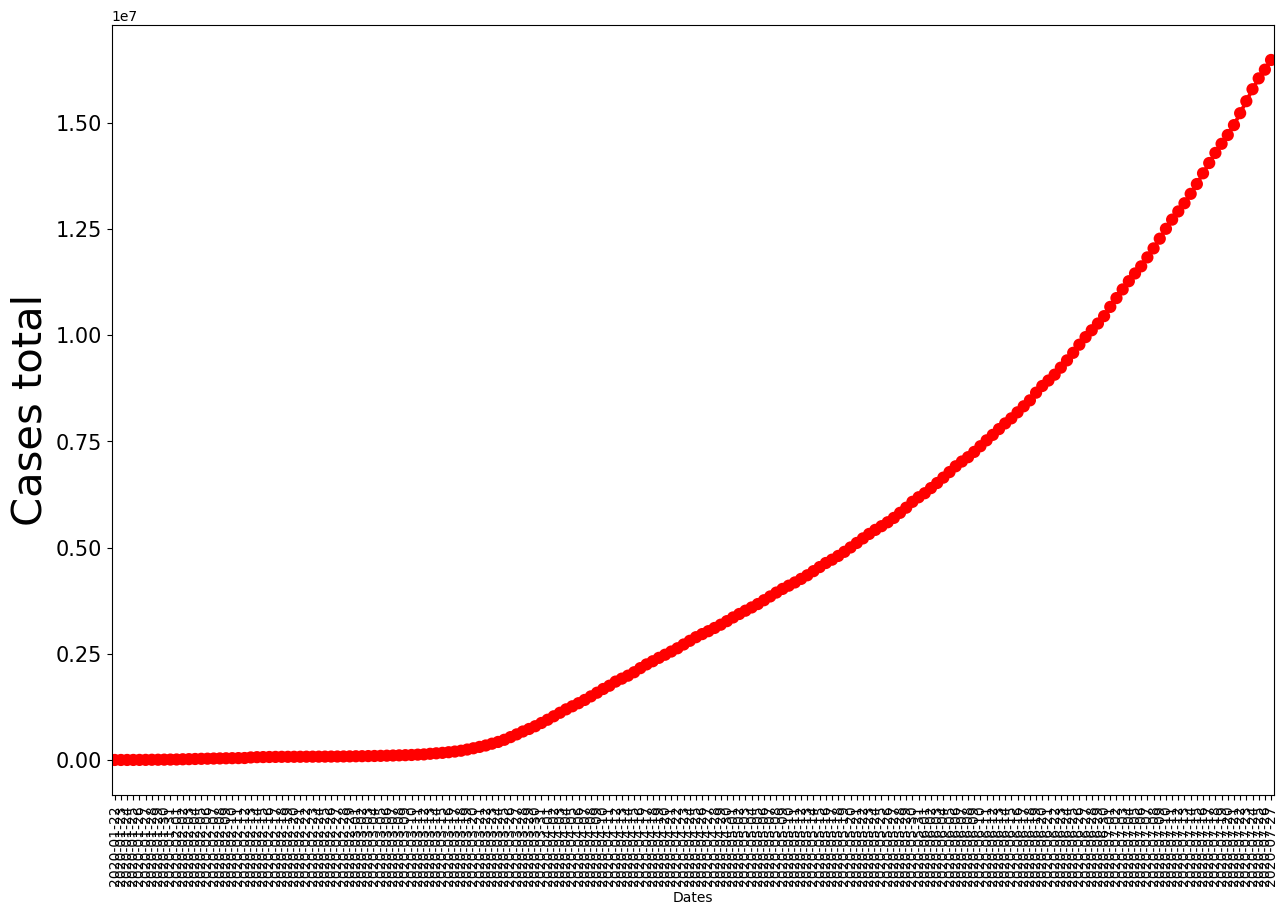

In [41]:
#plot for confirmed cases
plt.figure(figsize=(15,10))

t_cases=data.groupby('date')['confirmed'].sum().reset_index()
t_cases['date']=pd.to_datetime(t_cases['date'])

a=sns.pointplot(x=t_cases.date.dt.date,y=t_cases.confirmed,color='r')
a.set(xlabel='Dates',ylabel='Cases total')

plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=10)
plt.ylabel('Cases total',fontsize=30)

**Top 20 countries having most active cases**

In [44]:
t_actives = data.groupby('country')['active'].sum().sort_values(ascending=False).head(20).reset_index()
t_actives

,country,active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'US'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Russia'),
  Text(4, 0, 'India'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'Canada'),
  Text(8, 0, 'Peru'),
  Text(9, 0, 'Italy'),
  Text(10, 0, 'Pakistan'),
  Text(11, 0, 'South Africa'),
  Text(12, 0, 'Bangladesh'),
  Text(13, 0, 'Netherlands'),
  Text(14, 0, 'Sweden'),
  Text(15, 0, 'Turkey'),
  Text(16, 0, 'Colombia'),
  Text(17, 0, 'Saudi Arabia'),
  Text(18, 0, 'Belgium'),
  Text(19, 0, 'Chile')])

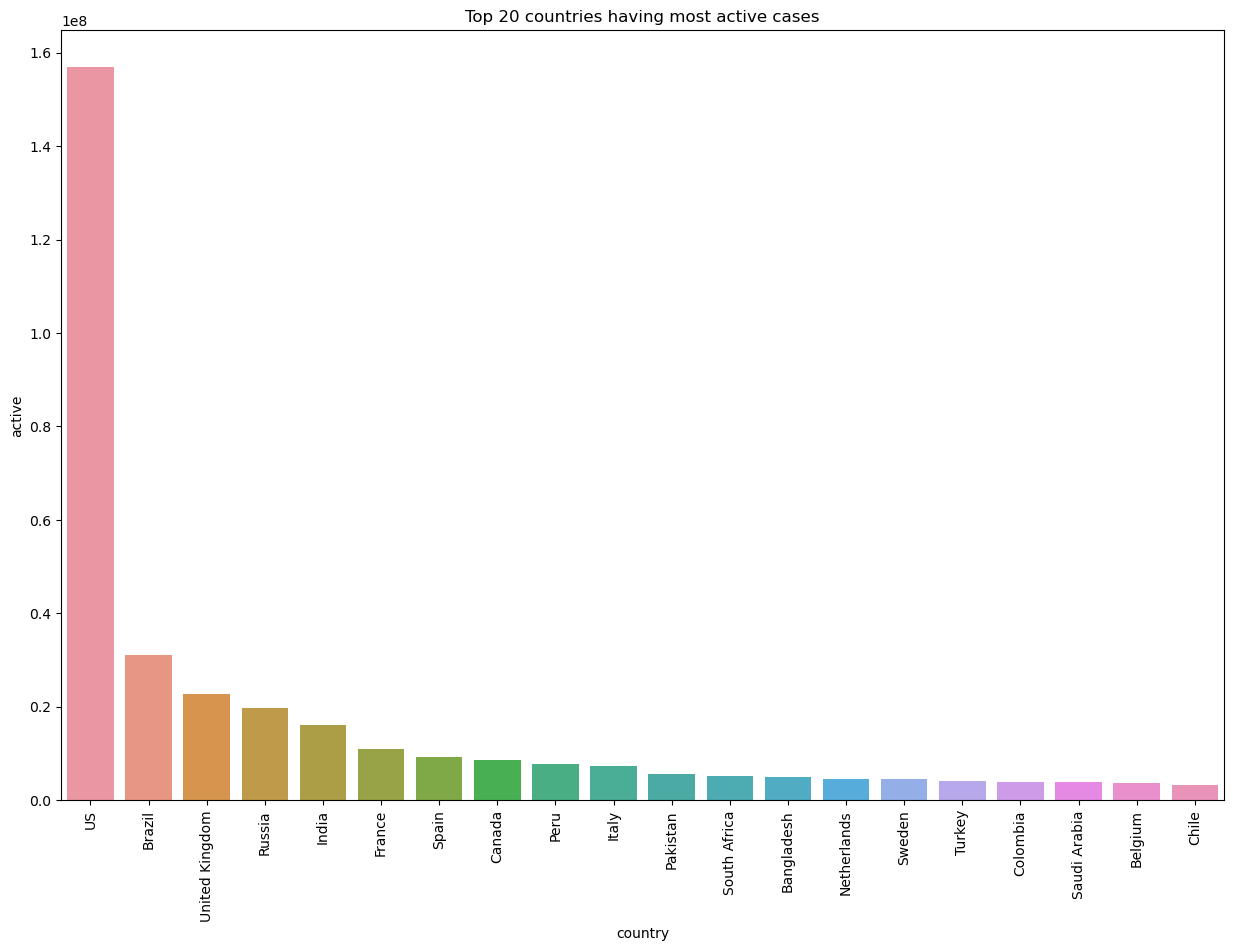

In [52]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries having most active cases')
sns.barplot(x=t_actives.country,y=t_actives.active)
plt.xticks(rotation=90,fontsize=10)

**Top 20 countries having most active cases**

In [54]:
t_deaths = data.groupby('country')['deaths'].sum().sort_values(ascending=False).head(20).reset_index()
t_deaths

,country,deaths
0,US,11011411
1,United Kingdom,3997775
2,Brazil,3938034
3,Italy,3707717
4,France,3048524
5,Spain,3033030
6,Mexico,1728277
7,India,1111831
8,Iran,1024136
9,Belgium,963679


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'US'),
  Text(1, 0, 'United Kingdom'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'Italy'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Spain'),
  Text(6, 0, 'Mexico'),
  Text(7, 0, 'India'),
  Text(8, 0, 'Iran'),
  Text(9, 0, 'Belgium'),
  Text(10, 0, 'Germany'),
  Text(11, 0, 'Canada'),
  Text(12, 0, 'China'),
  Text(13, 0, 'Peru'),
  Text(14, 0, 'Netherlands'),
  Text(15, 0, 'Russia'),
  Text(16, 0, 'Turkey'),
  Text(17, 0, 'Sweden'),
  Text(18, 0, 'Ecuador'),
  Text(19, 0, 'Chile')])

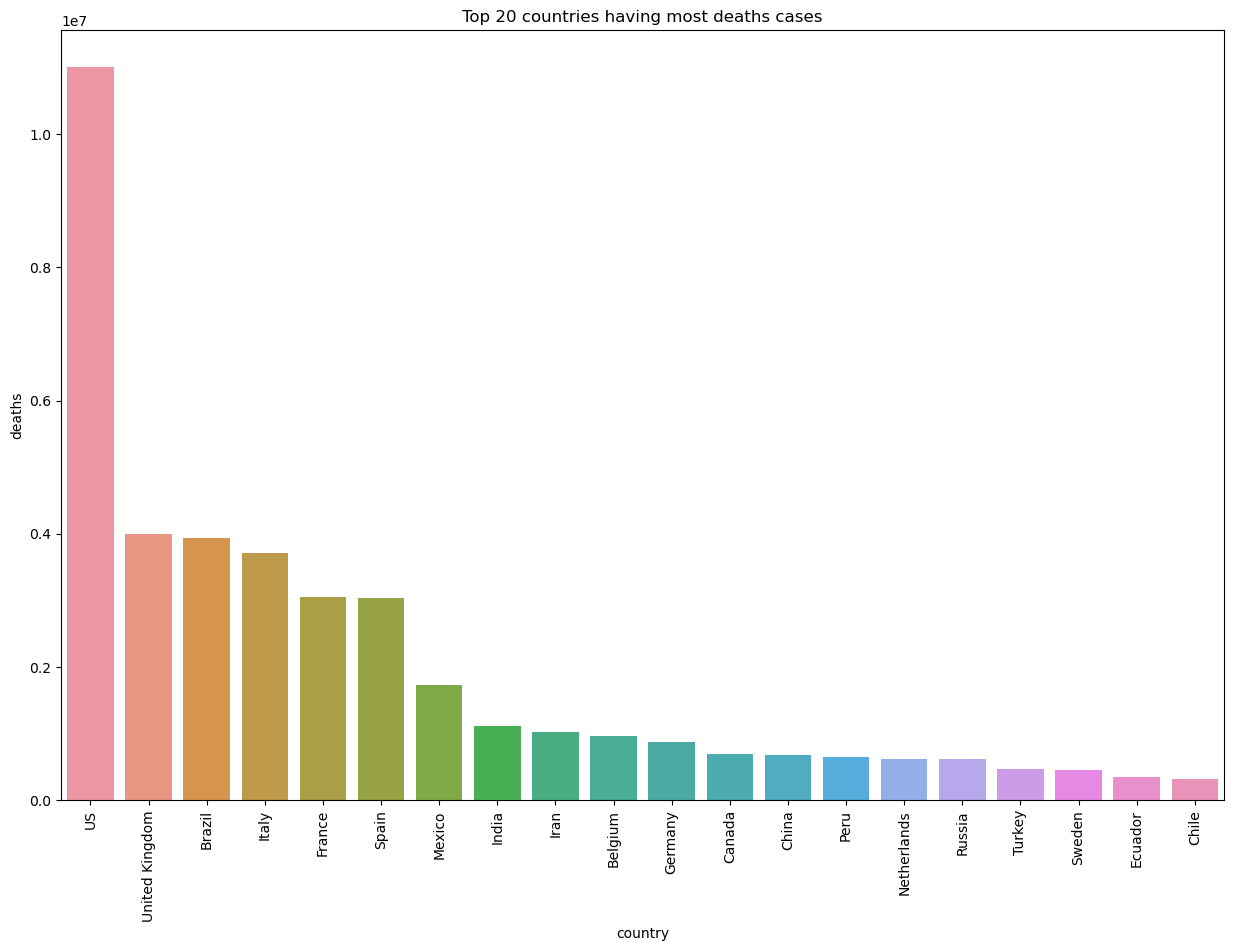

In [56]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries having most deaths cases')
sns.barplot(x=t_deaths.country,y=t_deaths.deaths)
plt.xticks(rotation=90,fontsize=10)

In [59]:
Brazil = data[data['country']=='Brazil']
Brazil = Brazil.groupby(by='date')[['confirmed','deaths','recovered','active']].sum().reset_index()
Brazil

,date,confirmed,deaths,recovered,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,2287475,84082,1620313,583080
184,2020-07-24,2343366,85238,1693214,564914
185,2020-07-25,2394513,86449,1785359,522705
186,2020-07-26,2419091,87004,1812913,519174


In [60]:
US = data[data['country']=='US']
US = US.groupby(by='date')[['confirmed','deaths','recovered','active']].sum().reset_index()
US

,date,confirmed,deaths,recovered,active
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5
...,...,...,...,...,...
183,2020-07-23,4038816,144430,1233269,2661117
184,2020-07-24,4112531,145560,1261624,2705347
185,2020-07-25,4178970,146465,1279414,2753091
186,2020-07-26,4233923,146935,1297863,2789125


In [61]:
Russia = data[data['country']=='Russia']
Russia = Russia.groupby(by='date')[['confirmed','deaths','recovered','active']].sum().reset_index()
Russia

,date,confirmed,deaths,recovered,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,793720,12873,579295,201552
184,2020-07-24,799499,13026,587728,198745
185,2020-07-25,805332,13172,596064,196096
186,2020-07-26,811073,13249,599172,198652


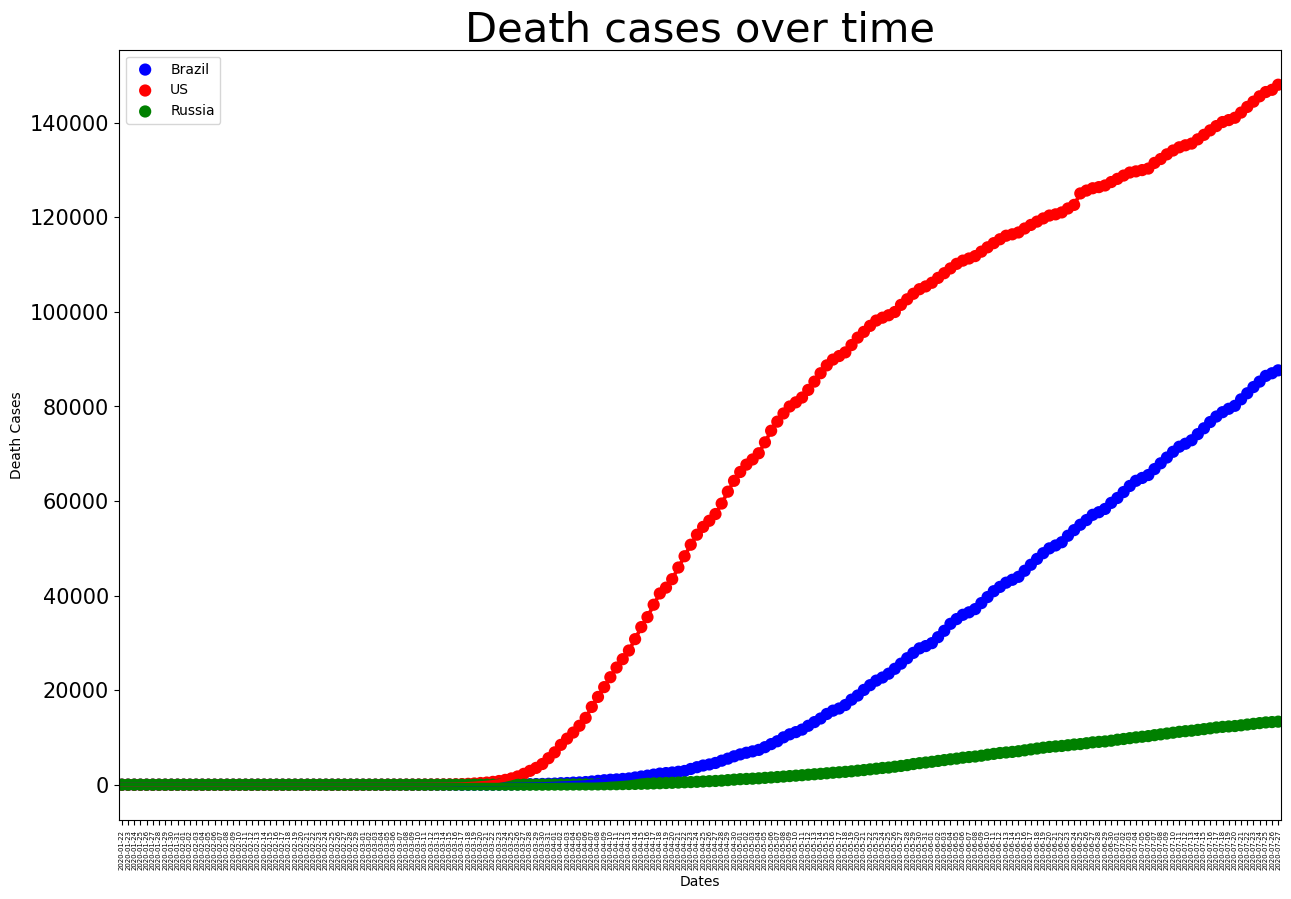

In [68]:
plt.figure(figsize=(15,10))
sns.pointplot(data=Brazil,x=Brazil.date,y=Brazil.deaths,color="Blue",label="Brazil")
sns.pointplot(data=US,x=US.date,y=US.deaths,color="Red",label="US")
sns.pointplot(data=Russia,x=Russia.date,y=Russia.deaths,color="Green",label="Russia")

plt.xlabel("Dates",fontsize=10)
plt.ylabel("Death Cases",fontsize=10)
plt.xticks(rotation=90,fontsize=5)
plt.title('Death cases over time', fontsize=30)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

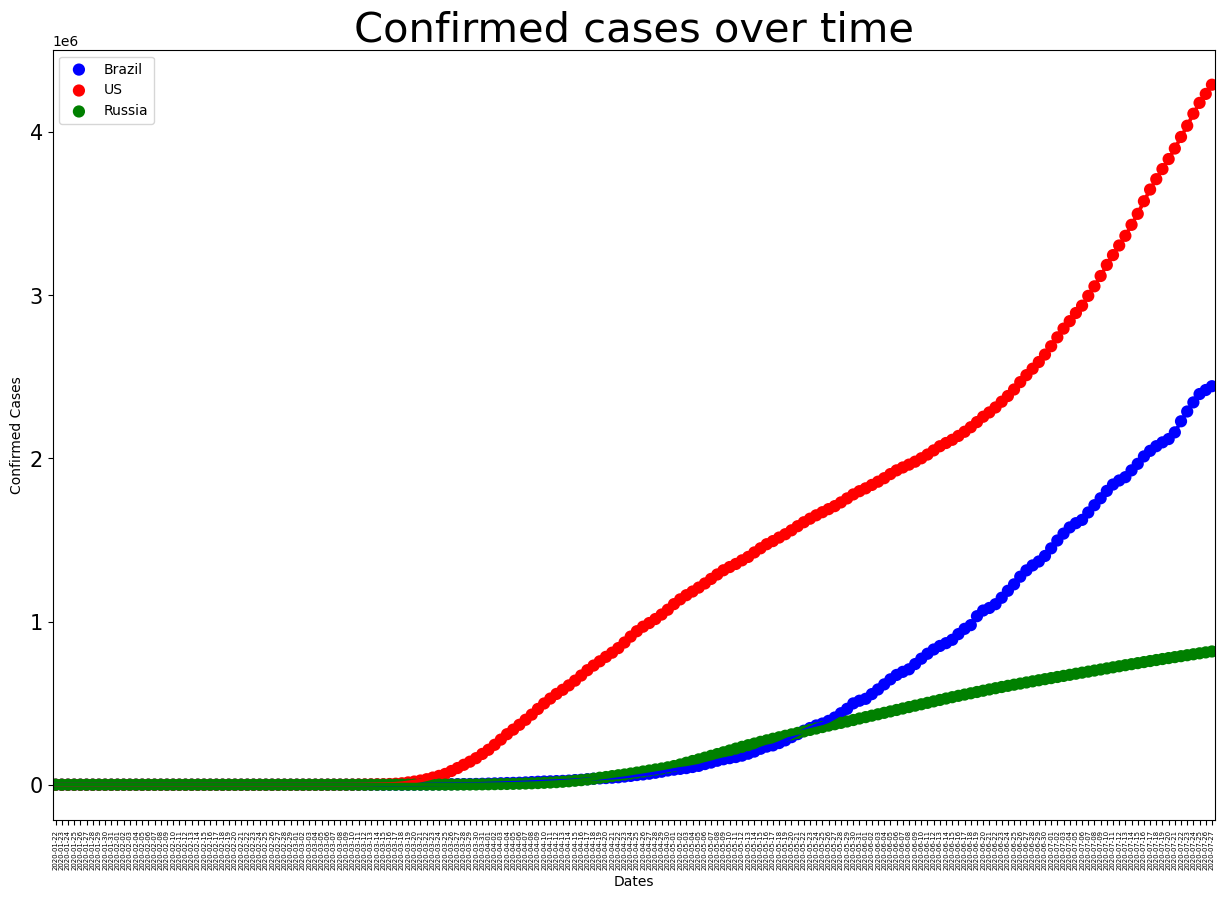

In [70]:
plt.figure(figsize=(15,10))
sns.pointplot(data=Brazil,x=Brazil.date,y=Brazil.confirmed,color="Blue",label="Brazil")
sns.pointplot(data=US,x=US.date,y=US.confirmed,color="Red",label="US")
sns.pointplot(data=Russia,x=Russia.date,y=Russia.confirmed,color="Green",label="Russia")

plt.xlabel("Dates",fontsize=10)
plt.ylabel("Confirmed Cases",fontsize=10)
plt.xticks(rotation=90,fontsize=5)
plt.title('Confirmed cases over time', fontsize=30)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

**conclusion: from the above plot we can conclude that US has the most numer of death cases followed by Brazil and India whereas Russia has the least numbber of death cases**

### Forecasting using FBPROPHET

In [71]:
pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/24/2b/834e9a347f2f0161e32a3c6125b8a1ebdf6ac33199a0ed3a0bdf1f0c296f/prophet-1.1.5-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/5d/12/6522f3de83ca690aa52f4b8c88a1e203abb1e2d75c31669dc004949143cd/cmdstanpy-1.2.4-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/20/37/730e4577a6e4eedf04a2948ccc0880b2931281ce8451d76dc47aad13f726/holidays-0.57-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/e1/6a/4604f9ae2fa62ef47b9de2fa5ad599589d28c9fd1d335f32759813dfa91e/importlib_resources-6.4.5-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/56/87/37a80e4d5bd453c33262d8fb618b6840fd98d24ed08e0

In [72]:
from prophet import Prophet 

In [73]:
data.head()

,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [76]:
data.groupby('date').sum().head()
data

,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [77]:
total_active = data['active'].sum()
print('Total no. of active COVID 19 cases:', total_active)

Total no. of active COVID 19 cases: 396715350


In [79]:
confirmed = data.groupby('date')['confirmed'].sum().reset_index()
confirmed

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [80]:
confirmed = data.groupby('date')['recovered'].sum().reset_index()
confirmed

,date,recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


#### Forecasting on Confirmed Case

In [97]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)

23:03:30 - cmdstanpy - INFO - Chain [1] start processing
23:03:30 - cmdstanpy - INFO - Chain [1] done processing


In [100]:
future =m.make_future_dataframe(periods=7,freq='D')
future 

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [101]:
future.tail()

,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [102]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,1.632401e+07,1.617334e+07,1.648100e+07
189,2020-07-29,1.653405e+07,1.637284e+07,1.669010e+07
190,2020-07-30,1.674820e+07,1.658837e+07,1.690439e+07
191,2020-07-31,1.696362e+07,1.680182e+07,1.712221e+07
192,2020-08-01,1.717143e+07,1.700546e+07,1.734929e+07
193,2020-08-02,1.736922e+07,1.720063e+07,1.755031e+07
194,2020-08-03,1.756410e+07,1.737785e+07,1.773609e+07


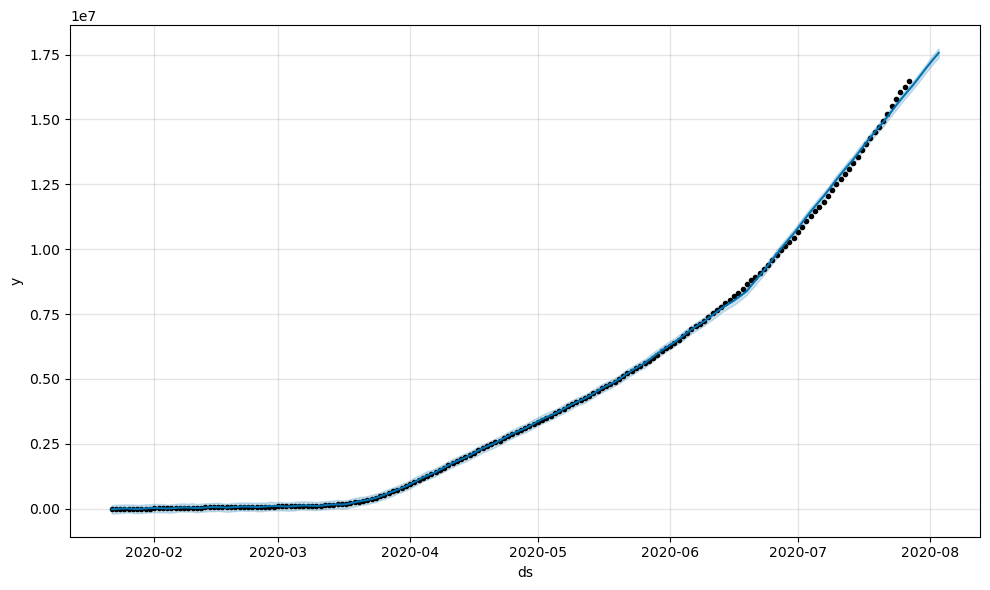

In [103]:
confirmed_forecast_plot =m.plot(forecast)